In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/auto-mpg.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0


Data Cleaning

In [ ]:
# Drop kolom yang tidak digunakan

dataset.drop(['car name'], axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
# Replace nilai "?" dengan Nan

dataset.replace("?", np.nan, inplace=True)

In [ ]:
dataset.isnull().sum().sort_values()

cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
mpg             0
horsepower      6
dtype: int64

In [ ]:
# Replace Nan dengan average

avg_1 = dataset['horsepower'].astype('float').mean(axis=0)
dataset['horsepower'].replace(np.nan, avg_1, inplace=True)

# Bila data Nan yang harus di replace banyak
# for i in dataset.columns:
#     if dataset[i].isnull().sum() > 0:
#         dataset[i].fillna(dataset[i].mean(), inplace=True)

In [ ]:
dataset.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
mpg             0
dtype: int64

In [ ]:
# Mengganti tipe dataset

dataset[['horsepower']] = dataset[['horsepower']].astype("float")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa140d6d2b0>,
      dtype=object)

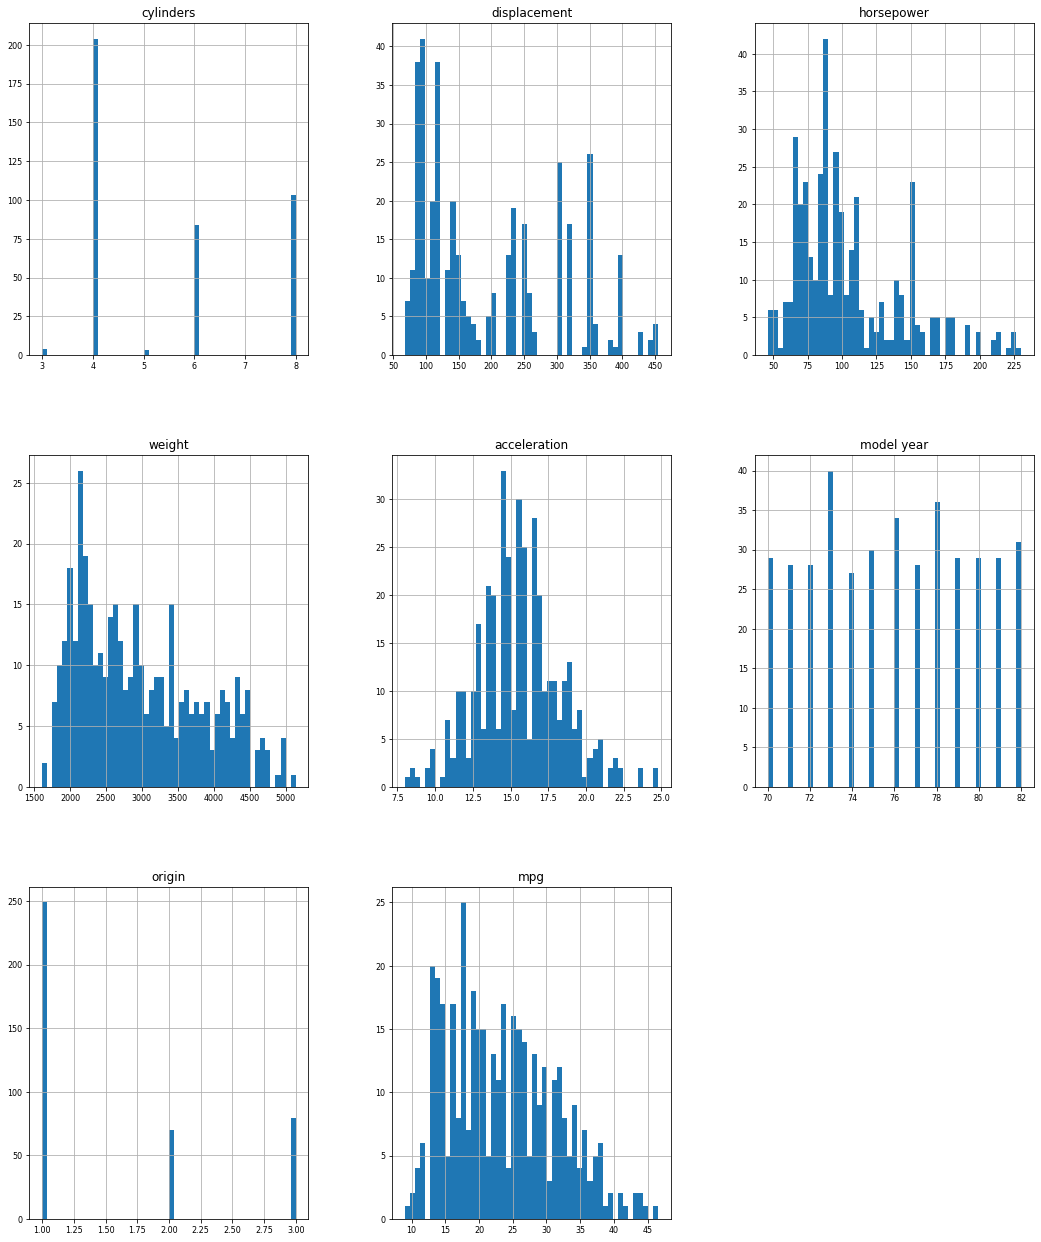

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
corr = dataset.corr()

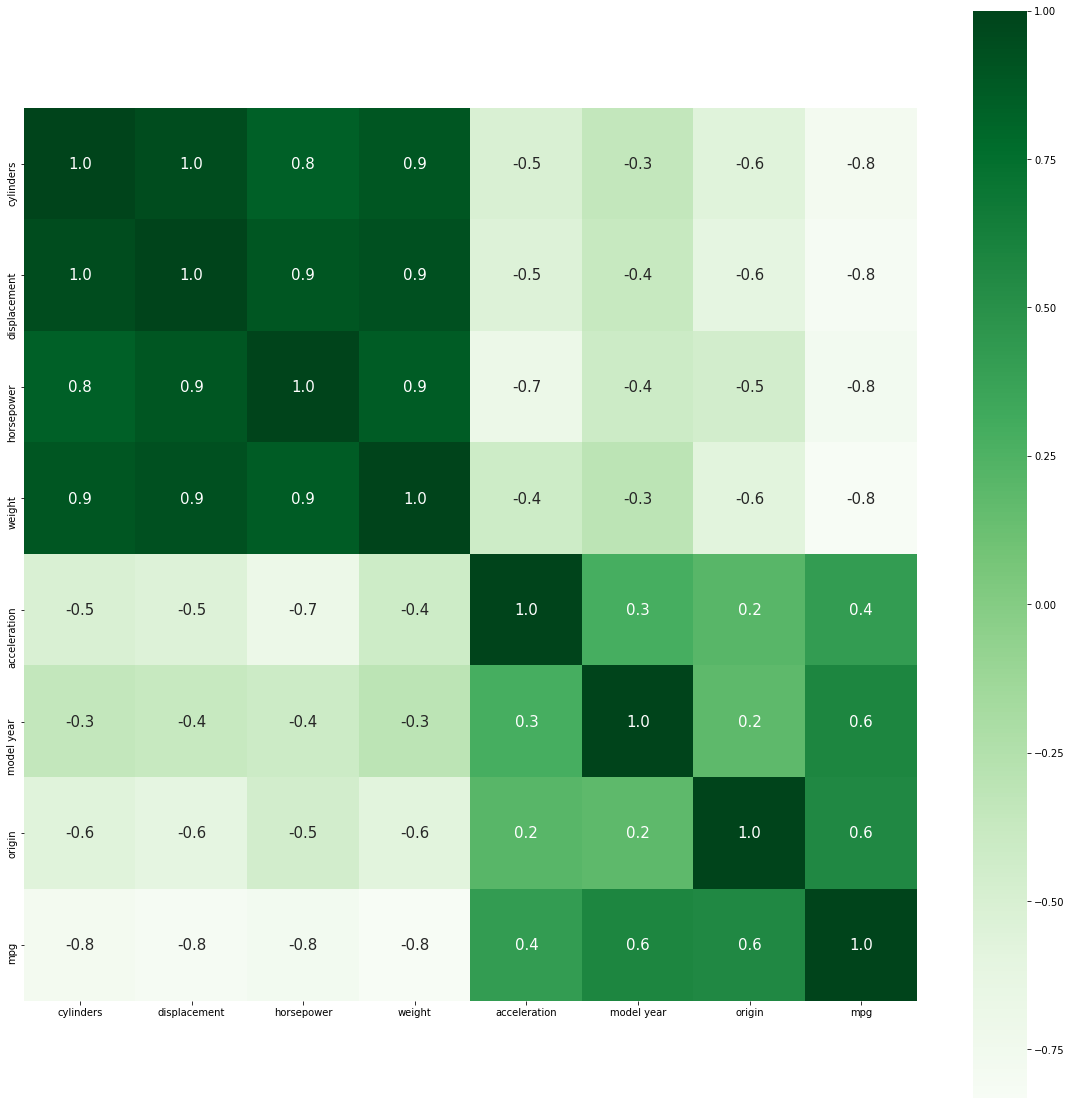

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Linear Regression

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

## Feature Engineering

In [ ]:
label = dataset['mpg']
features = dataset.drop(['mpg'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) :  0.2082842559141632
MAE (Mean Absolute Error) :  0.3684300891993139
r^2 score :  0.7924612118571435
RMSE (Root Mean Squared Error :  0.4563816998020004


## Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_baseline = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 5ms/step - loss: 0.9420 - val_loss: 0.8603
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.7125 - val_loss: 0.5670
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4209 - val_loss: 0.3325
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2579 - val_loss: 0.2639
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2173 - val_loss: 0.2457
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1984 - val_loss: 0.2323
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1843 - val_loss: 0.2169
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1720 - val_loss: 0.2085
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1610 - val_loss: 0.1994
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1524 - val_loss: 0.1929
Epoch 11/50
40/40 [

In [ ]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.15397575774950464
MAE (Mean Absolute Error) :  0.30061378754573936
r^2 score :  0.8465753351041582
RMSE (Root Mean Squared Error :  0.39239744870412274


In [ ]:
history_baseline_dataframe = pd.DataFrame(history_baseline.history)
history_baseline_dataframe['epoch'] = history_baseline.epoch
history_baseline_dataframe

,loss,val_loss,epoch
0,0.941951,0.860292,0
1,0.712461,0.566962,1
2,0.420923,0.332476,2
3,0.257875,0.263856,3
4,0.217350,0.245724,4
5,0.198400,0.232341,5
6,0.184316,0.216913,6
7,0.172038,0.208463,7
8,0.160979,0.199390,8
9,0.152443,0.192883,9


In [ ]:
history_baseline_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
49,0.105919,0.153976,49
44,0.107296,0.154029,44
48,0.106393,0.154110,48
41,0.108419,0.154748,41
46,0.106746,0.155189,46
37,0.111099,0.155601,37
47,0.107102,0.155606,47
43,0.108010,0.156164,43
36,0.110077,0.156696,36
38,0.109640,0.156711,38


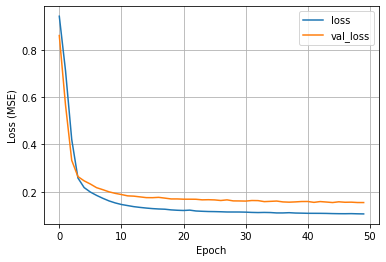

In [ ]:
plot_loss(history_baseline)

## Deeper Model

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_deeper = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9840 - val_loss: 0.9711
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.9034 - val_loss: 0.8046
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6199 - val_loss: 0.4417
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.3005 - val_loss: 0.2650
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2153 - val_loss: 0.2463
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1981 - val_loss: 0.2289
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1839 - val_loss: 0.2134
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1738 - val_loss: 0.2068
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1630 - val_loss: 0.1931
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1561 - val_loss: 0.1872
Epoch 11/50
40/40 [

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.15661234769884705
MAE (Mean Absolute Error) :  0.3006433691875376
r^2 score :  0.8439481817434085
RMSE (Root Mean Squared Error :  0.39574277971789584


In [ ]:
history_deeper_dataframe = pd.DataFrame(history_deeper.history)
history_deeper_dataframe['epoch'] = history_deeper.epoch
history_deeper_dataframe

,loss,val_loss,epoch
0,0.984013,0.971080,0
1,0.903386,0.804593,1
2,0.619900,0.441678,2
3,0.300546,0.265008,3
4,0.215263,0.246334,4
5,0.198088,0.228910,5
6,0.183888,0.213426,6
7,0.173795,0.206787,7
8,0.162981,0.193132,8
9,0.156138,0.187215,9


In [ ]:
history_deeper_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
44,0.105598,0.154885,44
40,0.108275,0.155014,40
30,0.112855,0.155046,30
42,0.105664,0.155647,42
37,0.107752,0.155687,37
32,0.110435,0.156311,32
25,0.116108,0.156326,25
49,0.104405,0.156612,49
48,0.103735,0.156734,48
33,0.110524,0.157226,33


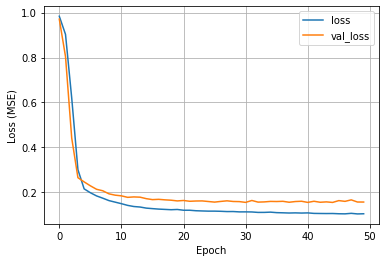

In [ ]:
plot_loss(history_deeper)

## Wider Model

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_wider = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.8838 - val_loss: 0.7650
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6055 - val_loss: 0.4515
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3227 - val_loss: 0.2747
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2224 - val_loss: 0.2496
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2059 - val_loss: 0.2365
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1912 - val_loss: 0.2213
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1785 - val_loss: 0.2107
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1678 - val_loss: 0.2015
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1601 - val_loss: 0.1952
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1876
Epoch 11/

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.1529874759574536
MAE (Mean Absolute Error) :  0.2934546795413654
r^2 score :  0.8475600797482779
RMSE (Root Mean Squared Error :  0.3911361348142787


In [ ]:
history_wider_dataframe = pd.DataFrame(history_wider.history)
history_wider_dataframe['epoch'] = history_wider.epoch
history_wider_dataframe

,loss,val_loss,epoch
0,0.883767,0.764953,0
1,0.605537,0.451497,1
2,0.322706,0.274711,2
3,0.222432,0.249558,3
4,0.205853,0.236517,4
...,...,...,...
95,0.092653,0.152891,95
96,0.092084,0.153668,96
97,0.092110,0.150960,97
98,0.092234,0.151690,98


In [ ]:
history_wider_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
69,0.096737,0.146273,69
89,0.094507,0.146426,89
63,0.098061,0.146827,63
92,0.093200,0.147480,92
79,0.094056,0.147592,79
...,...,...,...
4,0.205853,0.236517,4
3,0.222432,0.249558,3
2,0.322706,0.274711,2
1,0.605537,0.451497,1


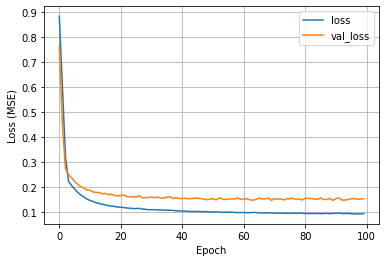

In [ ]:
plot_loss(history_wider)

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.9631 - val_loss: 0.8908
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7731 - val_loss: 0.6447
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5092 - val_loss: 0.4086
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3341 - val_loss: 0.3117
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2623 - val_loss: 0.2813
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2321 - val_loss: 0.2536
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2093 - val_loss: 0.2346
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1918 - val_loss: 0.2185
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1776 - val_loss: 0.2081
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1688 - val_loss: 0.1988
Epoch 11/

In [ ]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.15491499809713538
MAE (Mean Absolute Error) :  0.30118424684804357
r^2 score :  0.8456394563807923
RMSE (Root Mean Squared Error :  0.3935924263716661


In [ ]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
92,0.104674,0.147645,92
85,0.101949,0.149979,85
76,0.102830,0.150157,76
73,0.102918,0.150209,73
77,0.103178,0.150242,77
...,...,...,...
4,0.262271,0.281312,4
3,0.334079,0.311673,3
2,0.509181,0.408556,2
1,0.773114,0.644739,1


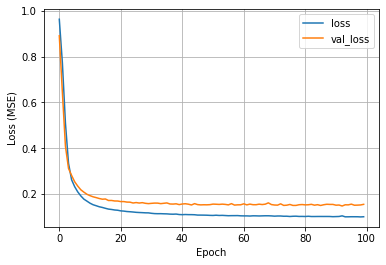

In [ ]:
plot_loss(history_tuned)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.8956 - val_loss: 0.7658
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6021 - val_loss: 0.4611
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3399 - val_loss: 0.2856
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2343 - val_loss: 0.2475
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2028 - val_loss: 0.2261
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1836 - val_loss: 0.2146
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1674 - val_loss: 0.2046
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1556 - val_loss: 0.1952
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1477 - val_loss: 0.1867
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1410 - val_loss: 0.1795
Epoch 11/

In [ ]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.1448206165041869
MAE (Mean Absolute Error) :  0.28668250193624234
r^2 score :  0.8556977092893341
RMSE (Root Mean Squared Error :  0.3805530403297113


In [ ]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
99,0.095757,0.144821,99
91,0.095586,0.146132,91
93,0.097269,0.146928,93
62,0.102355,0.147425,62
96,0.096188,0.147585,96
...,...,...,...
4,0.202821,0.226084,4
3,0.234294,0.247507,3
2,0.339851,0.285638,2
1,0.602067,0.461116,1


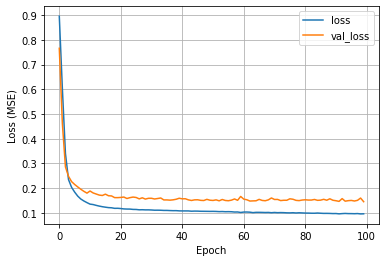

In [ ]:
plot_loss(history_rmsprop)

## Kesimpulan

Dari data di atas, didapatkan hasil :

- Normal Linear Regression
MSE (Mean Squared Error) :  0.2082842559141632
MAE (Mean Absolute Error) :  0.3684300891993139
r^2 score :  0.7924612118571435
RMSE (Root Mean Squared Error :  0.4563816998020004

- Baseline Model
MSE (Mean Squared Error) :  0.15397575774950464
MAE (Mean Absolute Error) :  0.30061378754573936
r^2 score :  0.8465753351041582
RMSE (Root Mean Squared Error :  0.39239744870412274

- Deeper Model
MSE (Mean Squared Error) :  0.15661234769884705
MAE (Mean Absolute Error) :  0.3006433691875376
r^2 score :  0.8439481817434085
RMSE (Root Mean Squared Error :  0.39574277971789584

- Wider Model Adam
MSE (Mean Squared Error) :  0.15661234769884705
MAE (Mean Absolute Error) :  0.3006433691875376
r^2 score :  0.8439481817434085
RMSE (Root Mean Squared Error :  0.39574277971789584

- Wider Model SGD
MSE (Mean Squared Error) :  0.15491499809713538
MAE (Mean Absolute Error) :  0.30118424684804357
r^2 score :  0.8456394563807923
RMSE (Root Mean Squared Error :  0.3935924263716661

- Wider Model Rmsprop
MSE (Mean Squared Error) :  0.1448206165041869
MAE (Mean Absolute Error) :  0.28668250193624234
r^2 score :  0.8556977092893341
RMSE (Root Mean Squared Error :  0.3805530403297113


Dapat dilihat Baseline Model memiliki r^2 score dan MSE lebih baik dari model yang lebih dalam layernya atau lebih lebar. Hal ini menandakan layer lebih dalam dan lebih lebar tidak selalu lebih baik. Namun, di satu sisi didapatkan nilai r^2 score dan MSE Wider Model Rmsprop lebih baik dari semuanya, kenapa.. karena mungkin memang untuk dataset Auto MPG lebih baik menggunakan algoritma Wider Model Rmsprop.